### Q.No. 1) Delivery_time -> Predict delivery time using sorting time. Build a simple linear regression model by performing EDA and do necessary transformations and select the best model using R or Python.

#### X-Single & Continous (Independant) and Y-Continous (Dependent)
#### X-Sorting Time, Y-Delivery Time.
### Therefore we go for Simple Linerar Regression Model

# Step 1. Import Necessary Libraries:

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf

import warnings
warnings.filterwarnings('ignore')

# Step 2. Import Data/Dataset:

In [3]:
delivery_details = pd.read_csv('delivery_time.csv')
delivery_details

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [4]:
dt_st=delivery_details.rename(columns={'Delivery Time': 'delivery_time','Sorting Time': 'sorting_time'})
dt_st
dt_st.head(5)

,delivery_time,sorting_time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


# Step 3. Data Understanding / Performing EDA on Data:

## Step 3.1 Initial Analysis:

In [5]:
delivery_details.shape

(21, 2)

In [6]:
delivery_details.dtypes

Delivery Time    float64
Sorting Time       int64
dtype: object

In [7]:
delivery_details.isnull().sum()

Delivery Time    0
Sorting Time     0
dtype: int64

In [8]:
delivery_details.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [9]:
delivery_details.describe()

,Delivery Time,Sorting Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


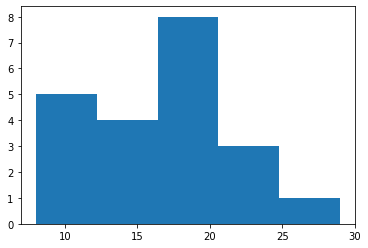

In [10]:
plt.hist(dt_st.delivery_time, bins=5)                     # Hist Plot of Delivery Time
plt.show()

## Step 3.2 Perform Assumption Checks:

### 1. Linearity Test:

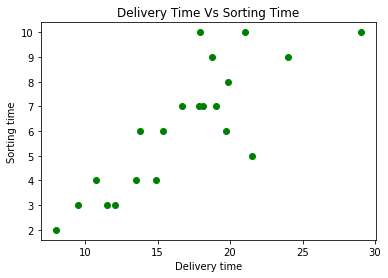

In [11]:
plt.scatter(x=dt_st.delivery_time, y=dt_st.sorting_time, color='green') #Scatter plot to check the linerity
plt.title('Delivery Time Vs Sorting Time')
plt.xlabel("Delivery time")
plt.ylabel("Sorting time")
plt.show()

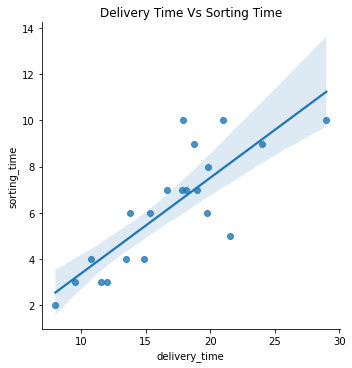

In [12]:
sns.lmplot(x='delivery_time', y='sorting_time', data=dt_st) #LM plot to check the linerity
plt.title('Delivery Time Vs Sorting Time')
plt.show()

### Linearity Test is FAILED.

### 2. Normality Test:

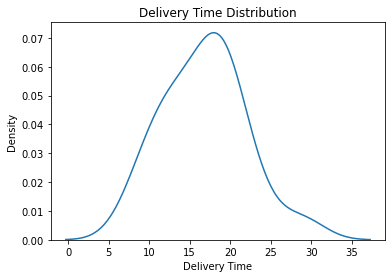

In [13]:
sns.distplot(delivery_details['Delivery Time'],hist=False) # Dist plot to check the normal distribution.
plt.title('Delivery Time Distribution')
plt.show()

### Normality Test is FAILED.

### 3. No Multicollinearity

Cannot be checked here.

### 4. No AutoRegression
Here we dont have input features with datetime datatype.

### 5. Homoscadasticity Check || 6. Zero Residual Mean

This can be performed only after **Model Training.**

## Step 3.3 Correlation Study:

In [14]:
dt_st.corr() #To check Correaltion between Dependent & Independent Vaiables

,delivery_time,sorting_time
delivery_time,1.000000,0.825997
sorting_time,0.825997,1.000000


### See below plot for Visualization of Correlation Between x and y:

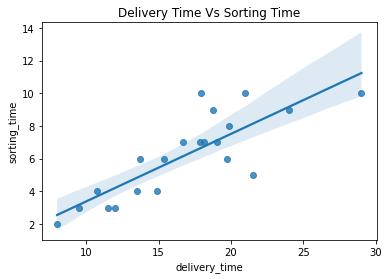

In [15]:
sns.regplot(x=dt_st['delivery_time'], y=dt_st['sorting_time']) #regplot = Regression Plot
plt.title('Delivery Time Vs Sorting Time')
plt.show()

#### There is little bit correlation between the two variable.
####  Score is > 0.8 which is a Good sign.

## Step 3.4 Outliers checking: 

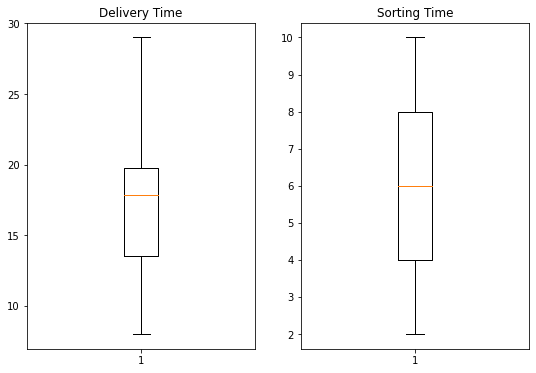

In [16]:
plt.subplots(figsize = (9,6))                     #To check outliers by plotting data:
plt.subplot(121)
plt.boxplot(dt_st['delivery_time'])
plt.title('Delivery Time')
plt.subplot(122)
plt.boxplot(dt_st['sorting_time'])
plt.title('Sorting Time')
plt.show()

### Look at above plots, there are "No Outliers" present in the  given dataset

## Setp 3.5. Feature Engineering: 

Trying different transformation of data **To estimate normal distribution and **To remove any skewness**

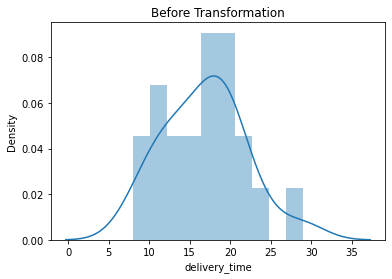

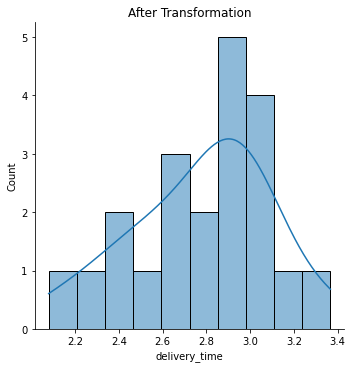

In [17]:
sns.distplot(dt_st['delivery_time'], bins = 10, kde = True)
plt.title('Before Transformation')
sns.displot(np.log(dt_st['delivery_time']), bins = 10, kde = True)
plt.title('After Transformation')
plt.show()

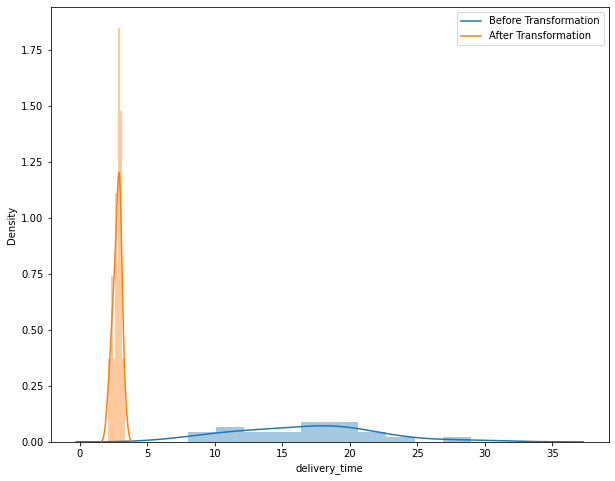

In [18]:
plt.figure(figsize= (10,8))
labels = ['Before Transformation','After Transformation']
sns.distplot(dt_st['delivery_time'], bins = 10, kde = True)
sns.distplot(np.log(dt_st['delivery_time']), bins = 10, kde = True)
plt.legend(labels)
plt.show()

# 4. Data Preparation:

In [19]:
dt_st.head(10)

,delivery_time,sorting_time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [20]:
dt_st.dtypes

delivery_time    float64
sorting_time       int64
dtype: object

In [21]:
dt_st.isnull().sum()

delivery_time    0
sorting_time     0
dtype: int64

# 5. Model Building || 6. Model Training:

Fitting a Linear Regression Model Using Ordinary least squares (OLS) regression.

It is a statistical method of analysis that estimates the relationship between one or more independent variables and a dependent variable; the method estimates the relationship by minimizing the sum of the squares in the difference between the observed and predicted values of the dependent variable configured as a straight line

Linear Regression can be built by using any of the 2 libraries:

1. Statsmodels
2. sklearn

### By using Statsmodel

In [22]:
lm_1 = smf.ols("delivery_time~sorting_time", data=dt_st).fit() 
lm_1

In [23]:
lm_1.params #For finding coefficient parameters: m=1.649020, x=? c=6.582734

Intercept       6.582734
sorting_time    1.649020
dtype: float64

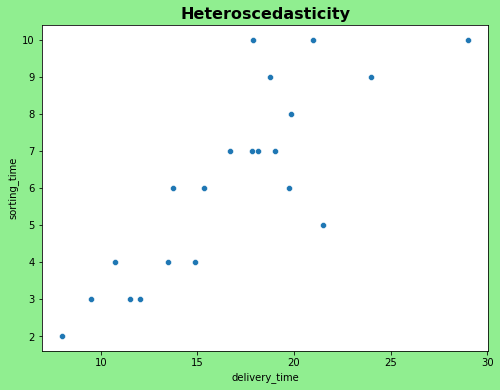

In [24]:
plt.figure(figsize = (8,6), facecolor = 'lightgreen')
sns.scatterplot(x = dt_st['delivery_time'], y = dt_st['sorting_time'])
plt.title('Heteroscedasticity', fontweight = 'bold', fontsize = 16)
plt.show()

# 7. Model Testing:

### 7.1 Manual Testing / Prediction:

In [25]:
# y = mx+c
# If x = 5, y = ??
( 1.649020 * 5) +  6.582734

14.827834

In [26]:
# y = mx+c
# If x = 8, y = ??
( 1.649020 * 8) +  6.582734

19.774894

In [27]:
# y = mx+c
# If x = 10, y = ??
( 1.649020 * 10) +  6.582734

23.072933999999997

In [28]:
lm_1.tvalues, lm_1.pvalues # Here we found t-values and p-values:

(Intercept       3.823349
 sorting_time    6.387447
 dtype: float64,
 Intercept       0.001147
 sorting_time    0.000004
 dtype: float64)

In [29]:
lm_1.summary() # Below we can the see the overall summary:

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          delivery_time   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Thu, 07 Jul 2022   Prob (F-statistic):           3.98e-06
Time:                        19:47:31   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        6.5827      1.722      3.823      0.001       2.979      10.186
sorting_time     1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [30]:
lm_1.conf_int(0.05) # Checking 95% confidence interval:

,0,1
Intercept,2.979134,10.186334
sorting_time,1.108673,2.189367


### 7.2 Automatic Testing / Prediction:

In [31]:
delivery_details.head(5)

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [32]:
test_model = pd.DataFrame(data={'sorting_time':[5,8,10]})
test_model

,sorting_time
0,5
1,8
2,10


In [33]:
lm_1.predict(test_model)

0    14.827833
1    19.774893
2    23.072933
dtype: float64

# 8. Model Deployment:

In [34]:
from pickle import dump

In [35]:
dump(lm_1, open('intel.pkl', 'wb'))

In [36]:
from pickle import load

In [37]:
loaded_intel_file = load(open('intel.pkl', 'rb'))
loaded_intel_file

In [38]:
loaded_intel_file.predict(test_model)

0    14.827833
1    19.774893
2    23.072933
dtype: float64

# =============================================================

### Q.No. 2) Salary_hike -> Build a prediction model for Salary_hike. Build a simple linear regression model by performing EDA and do necessary transformations and select the best model using R or Python.

y - continuous(Dependent), x - single & continuos (Independent)
1. y - Salary  
2. x - YearsExperience

# 1. Import Necessary Libraries:

In [63]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as sm
import statsmodels.formula.api as smf

import warnings
warnings.filterwarnings('ignore')

# 2. Import Data/Dataset:

In [40]:
salary_details = pd.read_csv('Salary_data.csv')
salary_details.head(5)

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


# 3. Data Understanding / Performing EDA on Data:

## Step 3.1 Initial Analysis:

In [41]:
salary_details.shape

(30, 2)

In [42]:
salary_details.dtypes

YearsExperience    float64
Salary             float64
dtype: object

In [43]:
salary_details.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

In [44]:
salary_details.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [45]:
salary_details.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


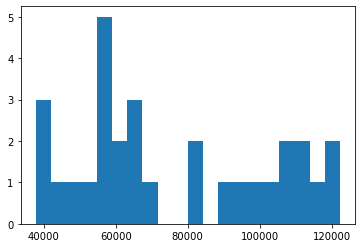

In [46]:
plt.hist(salary_details.Salary, bins=20)                     # Hist Plot of Salary
plt.show()

## Step 3.2 Perform Assumption Checks:

### 1. Linearity Test:

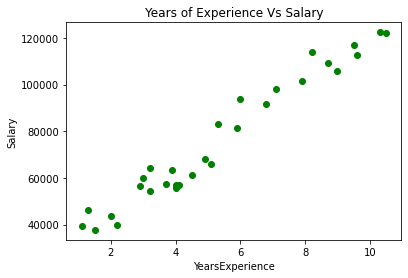

In [47]:
plt.scatter(x=salary_details.YearsExperience, y=salary_details.Salary, color='green') #Scatter plot to check the linerity
plt.title('Years of Experience Vs Salary')
plt.xlabel('YearsExperience')
plt.ylabel("Salary")
plt.show()

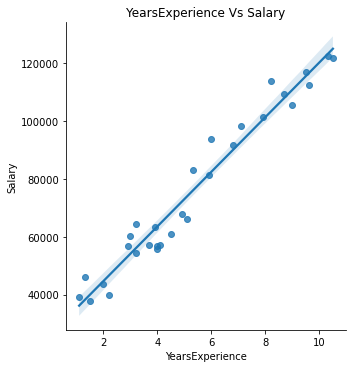

In [48]:
sns.lmplot(x='YearsExperience', y='Salary', data=salary_details) #LM plot to check the linerity
plt.title('YearsExperience Vs Salary')
plt.show()

### Linearity Test is FAILED.

### 2. Normality Test:

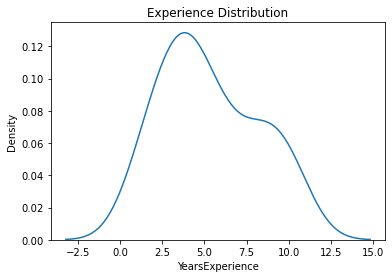

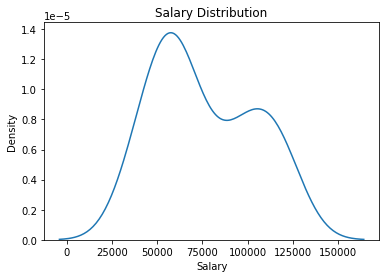

In [49]:
sns.distplot(salary_details['YearsExperience'],hist=False) # Dist plot to check the normal distribution.
plt.title('Experience Distribution')
plt.show()

sns.distplot(salary_details['Salary'],hist=False) # Dist plot to check the normal distribution.
plt.title('Salary Distribution')
plt.show()

### Normality Test is FAILED.

### 3. No Multicollinearity

Cannot be checked here.

### 4. No AutoRegression
Here we dont have input features with datetime datatype.

### 5. Homoscadasticity Check || 6. Zero Residual Mean

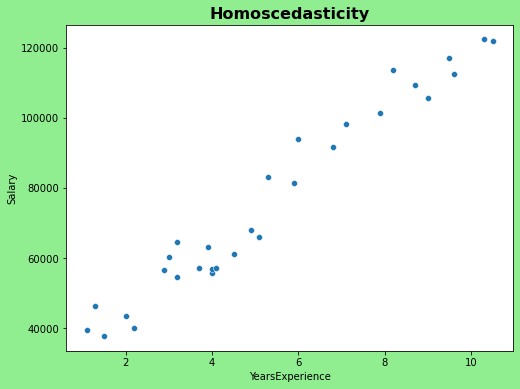

In [50]:
plt.figure(figsize = (8,6), facecolor = 'lightgreen')
sns.scatterplot(x = salary_details['YearsExperience'], y = salary_details['Salary'])
plt.title('Homoscedasticity', fontweight = 'bold', fontsize = 16)
plt.show()

In [51]:
salary_details.var()

YearsExperience    8.053609e+00
Salary             7.515510e+08
dtype: float64

As Salary Increases, the Years of Experience increases.
The data doesn't have any specific pattern in the variation. Hence, we can say it's Homoscedasticity.

## Step 3.3 Correlation Study:

In [52]:
salary_details.corr() #To check Correaltion between Dependent & Independent Vaiables

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


### See below plot for Visualization of Correlation Between x and y:

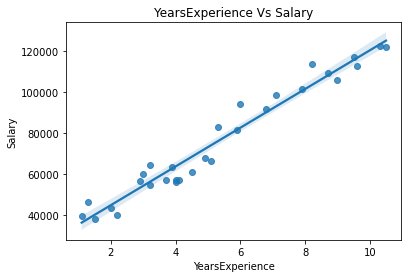

In [53]:
sns.regplot(x=salary_details['YearsExperience'], y=salary_details['Salary']) #regplot = Regression Plot
plt.title('YearsExperience Vs Salary')
plt.show()

#### There is GOOD correlation between the two variable.
####  Score is > 0.8 which is a Good sign.

## Step 3.4 Outliers checking: 

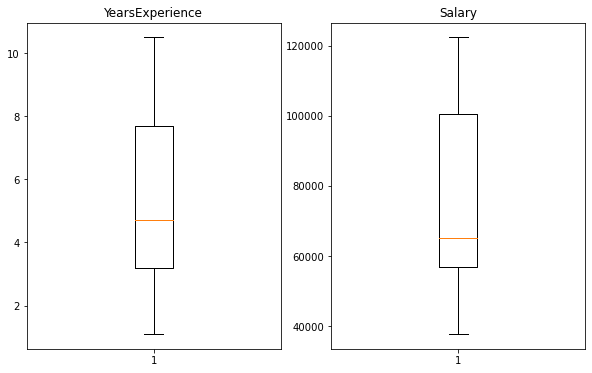

In [54]:
plt.subplots(figsize = (10,6))                     #To check outliers by plotting data:
plt.subplot(121)
plt.boxplot(salary_details['YearsExperience'])
plt.title('YearsExperience')
plt.subplot(122)
plt.boxplot(salary_details['Salary'])
plt.title('Salary')
plt.show()

### Look at above plots, there are "No Outliers" present in the  given dataset

## Setp 3.5. Feature Engineering: 

Trying different transformation of data **To estimate normal distribution and **To remove any skewness**

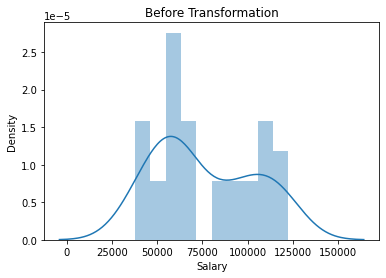

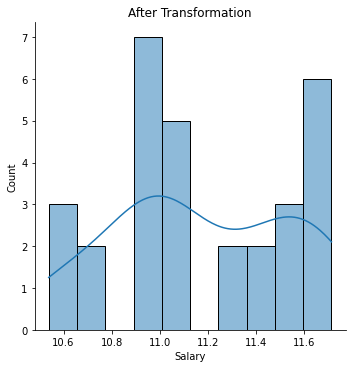

In [55]:
sns.distplot(salary_details['Salary'], bins = 10, kde = True)
plt.title('Before Transformation')
sns.displot(np.log(salary_details['Salary']), bins = 10, kde = True)
plt.title('After Transformation')
plt.show()

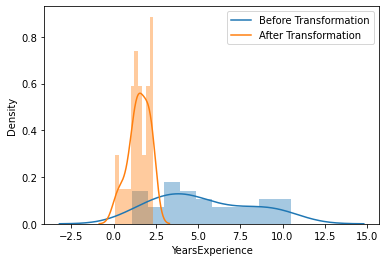

In [56]:
labels = ['Before Transformation','After Transformation']
sns.distplot(salary_details['YearsExperience'], bins = 10, kde = True)
sns.distplot(np.log(salary_details['YearsExperience']), bins = 10, kde = True)
plt.legend(labels)
plt.show()

# 4. Data Preparation:

In [57]:
salary_details.head(5)

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [58]:
salary_details.dtypes

YearsExperience    float64
Salary             float64
dtype: object

In [59]:
salary_details.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

# 5. Model Building || 6. Model Training:

Fitting a Linear Regression Model Using Ordinary least squares (OLS) regression.

It is a statistical method of analysis that estimates the relationship between one or more independent variables and a dependent variable; the method estimates the relationship by minimizing the sum of the squares in the difference between the observed and predicted values of the dependent variable configured as a straight line

Linear Regression can be built by using any of the 2 libraries:

1. Statsmodels
2. sklearn

### By using Statsmodel

In [73]:
lm_2 = smf.ols("Salary~YearsExperience", data=salary_details).fit() 
lm_2

In [60]:
lm_2.params #For finding coefficient parameters: m=9449.962321, x=? c=25792.200199

Intercept          25792.200199
YearsExperience     9449.962321
dtype: float64

In [61]:
lm_2.summary() #This model has better Accuracy as per R-squared value i.e. 95.7%.

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Thu, 07 Jul 2022   Prob (F-statistic):           1.14e-20
Time:                        19:40:40   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        2.579e+04   2273.053     11.347      0.000    2.11e+04    3.04e+04
YearsExperience  9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

R-squared and Adjusted R-squared scores are above 0.85

(It is a thumb rule to consider Adjusted R-squared to be greater than 0.8 to have a good model for prediction)

F-statitics is quite high and it must to be higher

But log-likelihood is quite very low far away from 0

AIC and BIC score are much higher for this model

Do some data transformation to check whether these scores can get any better than this.

In [64]:
# Square Root transformation on data
lm_3 = sm.ols('np.sqrt(Salary)~np.sqrt(YearsExperience)', data = salary_details).fit()
lm_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        np.sqrt(Salary)   R-squared:                       0.942
Model:                            OLS   Adj. R-squared:                  0.940
Method:                 Least Squares   F-statistic:                     454.3
Date:                Thu, 07 Jul 2022   Prob (F-statistic):           7.58e-19
Time:                        19:51:28   Log-Likelihood:                -116.52
No. Observations:                  30   AIC:                             237.0
Df Residuals:                      28   BIC:                             239.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                  103.5680      8.178     12.663      0.000      86.815     120.321
np.sqrt(YearsExperience)    75.6269      3.548     21.315      0.000      68.359      82.895
==============================================================================
Omnibus:                        0.924   Durbin-Watson:                   1.362
Prob(Omnibus):                  0.630   Jarque-Bera (JB):                0.801
Skew:                           0.087   Prob(JB):                        0.670
Kurtosis:                       2.219   Cond. No.                         9.97
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

R-squared and Adjusted R-squared scores are above 0.85 but it is getting less than previous model.

(It is a thumb rule to consider Adjusted R-squared to be greater than 0.8 to have a good model for prediction)

F-statitics getting a little lower for this model than previous.

But log-likelihood got better than before close to 0 higher than previous model

AIC and BIC score are now better for this model.

Again let's try some data transformation to check whether these scores can get any better than this.

In [65]:
# Cube Root transformation on data
lm_4 = sm.ols('np.cbrt(Salary)~np.sqrt(YearsExperience)', data = salary_details).fit()
lm_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        np.cbrt(Salary)   R-squared:                       0.944
Model:                            OLS   Adj. R-squared:                  0.942
Method:                 Least Squares   F-statistic:                     468.5
Date:                Thu, 07 Jul 2022   Prob (F-statistic):           5.06e-19
Time:                        19:51:30   Log-Likelihood:                -47.882
No. Observations:                  30   AIC:                             99.76
Df Residuals:                      28   BIC:                             102.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                   24.4757      0.830     29.495      0.000      22.776      26.176
np.sqrt(YearsExperience)     7.7919      0.360     21.644      0.000       7.054       8.529
==============================================================================
Omnibus:                        1.125   Durbin-Watson:                   1.474
Prob(Omnibus):                  0.570   Jarque-Bera (JB):                0.903
Skew:                           0.131   Prob(JB):                        0.637
Kurtosis:                       2.191   Cond. No.                         9.97
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [66]:
# Log transformation on Data
lm_5 = sm.ols('np.log(Salary)~np.log(YearsExperience)', data = salary_details).fit()
lm_5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         np.log(Salary)   R-squared:                       0.905
Model:                            OLS   Adj. R-squared:                  0.902
Method:                 Least Squares   F-statistic:                     267.4
Date:                Thu, 07 Jul 2022   Prob (F-statistic):           7.40e-16
Time:                        19:51:35   Log-Likelihood:                 23.209
No. Observations:                  30   AIC:                            -42.42
Df Residuals:                      28   BIC:                            -39.61
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                  10.3280      0.056    184.868      0.000      10.214      10.442
np.log(YearsExperience)     0.5621      0.034     16.353      0.000       0.492       0.632
==============================================================================
Omnibus:                        0.102   Durbin-Watson:                   0.988
Prob(Omnibus):                  0.950   Jarque-Bera (JB):                0.297
Skew:                           0.093   Prob(JB):                        0.862
Kurtosis:                       2.549   Cond. No.                         5.76
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# 7. Model Testing:

### 7.1 Manual Testing / Prediction:
 Checking for first 05 observations of dataset

In [67]:
# y = mx+c
# If x = 1.1, y = ??
(  9449.962321 * 1.1) + 25792.200199

36187.158752100004

In [68]:
# y = mx+c
# If x = 1.3, y = ??
(  9449.962321 * 1.3) + 25792.200199

38077.1512163

In [69]:
# y = mx+c
# If x = 1.5, y = ??
(  9449.962321 * 1.5) + 25792.200199

39967.1436805

In [70]:
# y = mx+c
# If x = 2.0, y = ??
(  9449.962321 * 2.0) + 25792.200199

44692.124841

In [ ]:
# y = mx+c
# If x = 2.2, y = ??
(  9449.962321 * 2.2) + 25792.200199

In [74]:
lm_2.tvalues, lm_2.pvalues # Here we found t-values and p-values:

(Intercept          11.346940
 YearsExperience    24.950094
 dtype: float64,
 Intercept          5.511950e-12
 YearsExperience    1.143068e-20
 dtype: float64)

In [75]:
lm_2.summary() # Below we can the see the overall summary:

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Thu, 07 Jul 2022   Prob (F-statistic):           1.14e-20
Time:                        20:38:11   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        2.579e+04   2273.053     11.347      0.000    2.11e+04    3.04e+04
YearsExperience  9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [76]:
lm_2.conf_int(0.05) # Checking 95% confidence interval:

,0,1
Intercept,21136.061314,30448.339084
YearsExperience,8674.118747,10225.805896


### 7.2 Automatic Testing / Prediction:

In [77]:
salary_details.head(5)

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [80]:
test_model = pd.DataFrame(data={'YearsExperience':[1.1,1.3,1.5,2.0,2.2]})
test_model

,YearsExperience
0,1.1
1,1.3
2,1.5
3,2.0
4,2.2


In [81]:
lm_2.predict(test_model)

0    36187.158752
1    38077.151217
2    39967.143681
3    44692.124842
4    46582.117306
dtype: float64

# 8. Model Deployment:

In [82]:
from pickle import dump

In [83]:
dump(lm_2, open('intel.pkl', 'wb'))

In [84]:
from pickle import load

In [85]:
loaded_intel_file_Salary_model = load(open('intel.pkl', 'rb'))
loaded_intel_file_Salary_model

In [86]:
loaded_intel_file_Salary_model.predict(test_model)

0    36187.158752
1    38077.151217
2    39967.143681
3    44692.124842
4    46582.117306
dtype: float64

# =============================================================